## Clustering algorithms
<ol>
<p>Unsupervised learning is a type of machine learning algorithm used to draw inferences from datasets consisting of input data <B>without labeled</B> responses.</p>
<p>The most common unsupervised learning method is <B>cluster analysis</B> is the most common unsupervised learning method used for exploratory data analysis to find hidden patterns. </p>


<p>Given a set of data points, group each data points together (in a cluster) such that:</p>
<li>points <B>in</B> each cluster are <B>similar</B></li>
<li>points <B>between</B> clusters are <B>dissimilar</B></li>

</ol>



<img src="images/clus.PNG", width=500, height=500></img>

###### Source: https://web.stanford.edu/class/cs345a/slides/12-clustering.pdf

Common clustering algorithms include:
<ol>
<li><B>Hierarchical clustering</B>: builds a multilevel hierarchy of clusters by creating a cluster tree</li>
<li><B>k-Means clustering</B>: partitions data into k distinct clusters based on distance to the centroid of a cluster</li>
<li><B>Gaussian mixture models</B>: models clusters as a mixture of multivariate normal density components</li>
<li><B>Self-organizing maps</B>: uses neural networks that learn the topology and distribution of the data</li>
<li><B>Hidden Markov models</B>: uses observed data to recover the sequence of states</li>
</ol>

<p>This tutorial will first focus on the <B>K-means</B> algorithm</p>

###### Source: https://www.mathworks.com/help/stats/examples/cluster-analysis.html?requestedDomain=www.mathworks.com

### K-means

<p><b>K</b>-means clustering partitions the objects into <b>K</b> mutually exclusive clusters</p>
<p>Objects within each cluster are as <b>close</b> to each other as possible, and as <b>far</b> from objects in other clusters as possible.</p>
<p>Each cluster is characterized by its <b>centroid</b>, or center point.<p>

<p>Each data point is assigned to its nearest centroid, based on the squared <B>Euclidean distance</B>.</p>


##### The algorithm
<ol>
<li>Partition of objects into k non-empty subsets</li>
<li>Identifying the cluster centroids (mean point) of the current partition.</li>
<li>Assigning each point to a specific cluster.</li>
<li>Compute the distances from each point and allot points to the cluster where the distance from the centroid is minimum.</li>
<li>After re-allotting the points, find the centroid of the new cluster formed.</li>
<li>Assigning data points to clusters based on the current centroids</li>
<li>Choosing centroids based on the current assignment of data points to clusters.</li>
<li>iterate</li>
</ol>


<img src="images/kmeans.PNG", width=500, height=500, align=left>

<br />
<p>&nbsp; &nbsp;(a) Original dataset</p>
<p>&nbsp; &nbsp;(b) Random initial cluster centroids.</p>
<p>&nbsp; &nbsp;(c-f) two iterations of k-means.</p> 
<br /><br /><br /><br /><br /><br /><br /><br /><br /><br />
###### Source: http://stanford.edu/~cpiech/cs221/handouts/kmeans.html

### The Algorithm

Implementing an algorithm is the best way to understand it. So this code holds the steps of the K-means algorithm 

In [1]:
# Function: K Means
# -------------
# K-Means is an algorithm that takes in a dataset and a constant
# k and returns k centroids (which define clusters of data in the
# dataset which are similar to one another).
def kmeans(dataSet, k):
	
    # Initialize centroids randomly
    numFeatures = dataSet.getNumFeatures()
    centroids = getRandomCentroids(numFeatures, k)
    
    # Initialize book keeping vars.
    iterations = 0
    oldCentroids = None
    
    # Run the main k-means algorithm
    while not shouldStop(oldCentroids, centroids, iterations):
        # Save old centroids for convergence test. Book keeping.
        oldCentroids = centroids
        iterations += 1
        
        # Assign labels to each datapoint based on centroids
        labels = getLabels(dataSet, centroids)
        
        # Assign centroids based on datapoint labels
        centroids = getCentroids(dataSet, labels, k)
        
    # We can get the labels too by calling getLabels(dataSet, centroids)
    return centroids
# Function: Should Stop
# -------------
# Returns True or False if k-means is done. K-means terminates either
# because it has run a maximum number of iterations OR the centroids
# stop changing.
def shouldStop(oldCentroids, centroids, iterations):
    if iterations > MAX_ITERATIONS: return True
    return oldCentroids == centroids

In [2]:
# Function: Should Stop
# -------------
# Returns True or False if k-means is done. K-means terminates either
# because it has run a maximum number of iterations OR the centroids
# stop changing.
def shouldStop(oldCentroids, centroids, iterations):
    if iterations > MAX_ITERATIONS: return True
    return oldCentroids == centroids


In [3]:
# Function: Get Labels
# -------------
# Returns a label for each piece of data in the dataset. 
def getLabels(dataSet, centroids):
    # For each element in the dataset, chose the closest centroid.
    # Make that centroid the element's label.# Function: Get Centroids
    pass
# -------------
# Returns k random centroids, each of dimension n.
def getCentroids(dataSet, labels, k):
    # Each centroid is the geometric mean of the points that
    # have that centroid's label. Important: If a centroid is empty (no points have
    # that centroid's label) you should randomly re-initialize it.
    pass

In [4]:
# Function: Get Centroids
# -------------
# Returns k random centroids, each of dimension n.
def getCentroids(dataSet, labels, k):
    # Each centroid is the geometric mean of the points that
    # have that centroid's label. Important: If a centroid is empty (no points have
    # that centroid's label) you should randomly re-initialize it.
    pass

For the application of the K-Means algorithm we will use Python's scikit-learn built in library


### Basic Example: Iris Data Set
+ using the Python packages scikit-learn
+ pip install sklearn


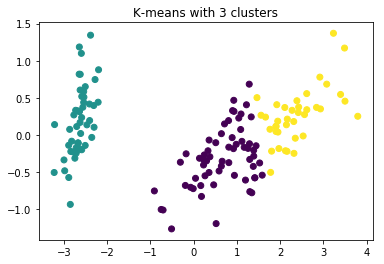

In [5]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

#load data set 
iris = load_iris()

#preprocess by doing dimensionality reduction with PCA
pca = PCA(n_components=2).fit(iris.data)
pca_2d = pca.transform(iris.data)

#Kmeans algorithm on iris data set with K set to 3
kmeans = KMeans(n_clusters=3, random_state=111)
kmeans.fit(iris.data)

#plotting the results
plt.title('K-means with 3 clusters')
plt.scatter(pca_2d[:, 0], pca_2d[:, 1], c=kmeans.labels_)
plt.show()

K-means does a good at splitting the data into 3 groups. Knowing ahead that the famous iris dataset contains measurements of 3 kinds othe plant we can see 3 clean clusters. 

### Further Exploration with K-Means

### Data

Data taken from the UCI ML mrepository

Source http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/

In [6]:
import pandas as pd
#Reading file
df = pd.read_csv('data/winequality-red.csv',sep=';', lineterminator='\n')

In [7]:
#Overview
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [8]:
#size
df.shape

(1599, 12)

In [9]:
#description
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [10]:
# looking for the classes 
quality = df.groupby(['quality'])
quality.size() 

quality
3     10
4     53
5    681
6    638
7    199
8     18
dtype: int64

From our data we have 6 different wine qualities ranging from 3 to 8
a K of 6 would be a ideal here to be able to seperate data into 6 clusters we do not have enought data in all our classes and would introduce a bias in our results. That's why we should focus on classes 5-6

In [11]:
#keeping the classes with the wine quality 5,6,7
df2 = df.query('4<quality<7')

In [12]:
#making sure of the classes
q = df2.groupby(['quality'])
q.size()

quality
5    681
6    638
dtype: int64

## K-Means on Data 
Applied tutorials from
+ Source : https://www.datascience.com/blog/k-means-clustering
+ Source : http://www.dummies.com/programming/big-data/data-science/how-to-visualize-the-clusters-in-a-k-means-unsupervised-learning-model/


In [13]:
import numpy as np
#Selecting two feature
f1 = df2['pH'].values
f2 = df2['chlorides'].values

#prepocess for kmeans function paramter using numpy matrix
X=np.matrix(zip(f1,f2))

In [14]:
# select the number of clusters (k) to 3 in the function below
kmeans = KMeans(n_clusters=2).fit(X)

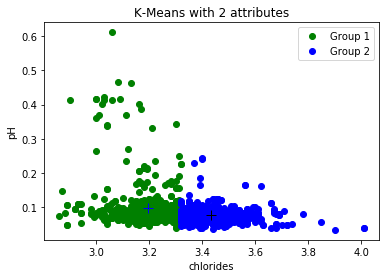

In [15]:
# Plot the results: for each group and each centerpoint
plt.figure()
h1,=plt.plot(f1[kmeans.labels_== 0],f2[kmeans.labels_==0],'go')                                     #group 1
plt.plot(np.mean(f1[kmeans.labels_== 0]),np.mean(f2[kmeans.labels_==0]),'b+',markersize=10)         #centerpoint 1
h2,=plt.plot(f1[kmeans.labels_== 1],f2[kmeans.labels_==1],'bo')                                     #group 2
plt.plot(np.mean(f1[kmeans.labels_== 1]),np.mean(f2[kmeans.labels_==1]),'k+',markersize=10)         #centerpoint 2



# Putting the labels
plt.title('K-Means with 2 attributes')
plt.ylabel('pH')
plt.xlabel('chlorides')
plt.legend([h1,h2],['Group 1','Group 2'], loc='upper right')
plt.show()

In [16]:
df2.quality[100]

6

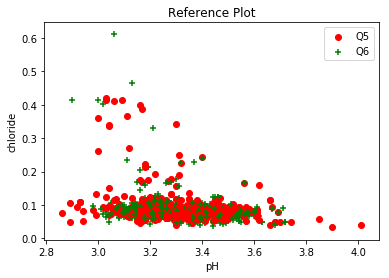

In [17]:
for i in range(0, len(X)):
    try:
        if df2.quality[i] == 5:
            c1 = plt.scatter(X[i,0],X[i,1],c='r',marker='o')
        elif df2.quality[i] == 6:
            c2 = plt.scatter(X[i,0],X[i,1],c='g',marker='+')
    except:
        pass

plt.legend([c1, c2], ['Q5', 'Q6'])
plt.title('Reference Plot')
plt.xlabel('pH')
plt.ylabel('chloride')
plt.show()

Unfortunately by simply plotting out the data points for the 2 quality wines for the two attributes chloride and pH we do not perceive a distinction in the classes but PCA shows two distinct groups 1-2 by trying to seperate our data points as much as possible. So let's move on to the whole set of attributes and using a dimensionality reduction.

### For the whole set of attributes


The data need to be preprocessed in similar ways as the iris data using PCA

In [18]:
#preprocessing
pca = PCA(n_components=2).fit(df2)
pca_2d = pca.transform(df2)

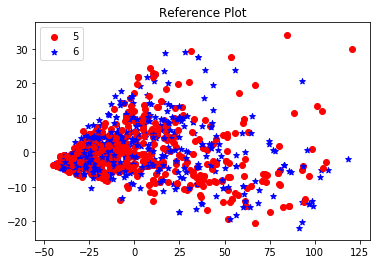

In [19]:
for i in range(0, pca_2d.shape[0]):
    try:
        if df2.quality[i] == 5:
            c1 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='r',marker='o')
        elif df2.quality[i] == 6:
            c2 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='b',marker='*')
    except:
        pass
plt.legend([c1, c2], ['5', '6'])
plt.title('Reference Plot')
plt.show()

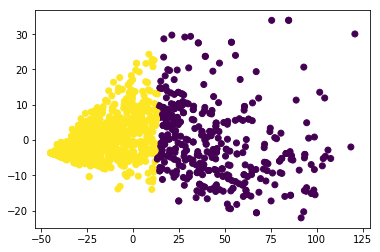

In [20]:
kmeans = KMeans(n_clusters=2, random_state=111)
kmeans.fit(df2)
plt.figure('K-means with 2 clusters')
plt.scatter(pca_2d[:, 0], pca_2d[:, 1], c=kmeans.labels_)
plt.show()

Because we know our class labels we are able to create the reference plot and check the results of Kmeans. K-means is an unsuperised learning algorithm so will produce these results not knowing the class labels which is pretty impressive. And weirdly enough in the wine data set the difference between a wine of quality 5 or 6 is not clearly distinguishable


## Hierarchical Clustering


<p>Hierarchical or agglomerative clustering tries to <b>link each data point</b>, by a distance measure, to its nearest neighbor, creating a cluster<p>

<p>source: http://brandonrose.org/clustering#Hierarchical-document-clustering</p>

<p>Types of Hiearchical Clustering </p>
<ol>
<li><b>Agglomerative</b>: bottom up approach: each observation starts in its own cluster, and pairs of clusters are merged as one moves up the hierarchy.</li>
<li><b>Divisive</b>: This is a "top down" approach: all observations start in one cluster, and splits are performed recursively as one moves down the hierarchy.</li>
</ol>

<p>Source: https://en.wikipedia.org/wiki/Hierarchical_clustering</p>

<p>After successfully using K-means the next part of the tutorial will focus on another clustering algorithm: the <b>Ward clustering algorithm</b> a hierarchical agglomerative clustering algorithm<p>

<ol>
<li>Hierarchical cluster analysis of n objects is defined by a stepwise algorithm which merges two objects at each step, the two which have the least dissimilarity.</li>
<li>Dissimilarities between clusters of objects can be defined in several ways; for example, the maximum dissimilarity (complete linkage), minimum dissimilarity (single linkage) or average dissimilarity (average linkage).</li>
<li>The <b>results of a cluster analysis</b> is a binary tree or <b>dendrogram</b>, with n – 1 nodes.  The branches of this tree are cut at a level where there is a lot of ‘space’ to cut them, that is where the jump in levels of two consecutive nodes is large.</li>
</ol>

<p>Source: http://84.89.132.1/~michael/stanford/maeb7.pdf</p>

## The Algorithm
<p>Using Ward's Method</p> 
<ol>
<li>Start out with all sample units in n clusters of size 1 each: n - 1 clusters are formed</li>
<li>Compute error sum of squares and r2 values.</li>
<li>Yield the smallest error sum of squares</li>
<li>n - 2 clusters are formed from the n - 1 clusters defined in 1)</li>
<li>Iterate and combine cluster in such a way as to minimize the results of error from the squares</li>
<p>The algorithm stops when all sample units are combined into a single large cluster of size n.<p>

<p> Source: http://sites.stat.psu.edu/~ajw13/stat505/fa06/19_cluster/09_cluster_wards.html </p>

<img src="images/ward.jpg", width=300, height=300, align=left>
<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>
<p>Source: http://mars.wiwi.hu-berlin.de/mediawiki/teachwiki/images/thumb/c/cb/Draco_cluster.JPG/300px-Draco_cluster.JPG </p>

### Simple Example 

We return to the famous example of the iris data set and generate a <b>dendogram</b> which is a tree diagramthat illustrates the arrangement of the clusters produced by hierarchical clustering
+ Source: https://github.com/scikit-learn/scikit-learn/pull/3464


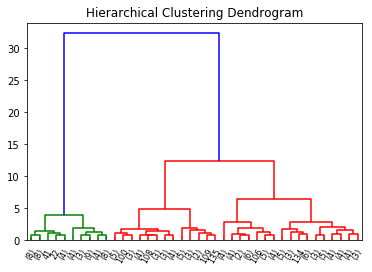

In [21]:
## author: Jörn Hees (JornHees)
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.datasets import load_iris

iris = load_iris()
linkage_matrix = linkage(iris.data, 'ward') ## using the ward algorithm
dendrogram(
    linkage_matrix,
    truncate_mode="lastp",  # show only the last p merged clusters
    p=40,                   # show only the last p merged clusters
    show_leaf_counts=True,  # numbers in brackets are counts, others idx
    leaf_rotation=60.,
    leaf_font_size=8.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

<p>The y-axis contains information about the distance (ward in this case) between the clusters. </p>
<p>If we cut the dendogram at 10 meaning we set the <b>distance cut-off to 10</b> we can see 3 stems associated to <b>3 clusters</b>.</p>

### Wine Data

<p>let's go back and apply it to our wine data set (the prepocessed one containing the two dominant class labeled 5 and 6)</p>

In [22]:
## remving class label: quality 
df5 = df2
df5 = df5.drop(df5.columns[-1], axis=1)

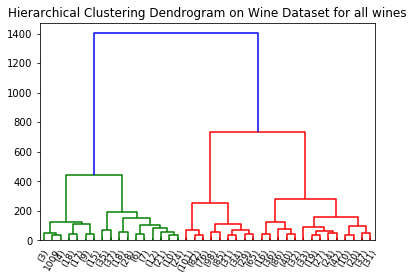

In [23]:
## author: Jörn Hees (JornHees)

linkage_matrix = linkage(df5, 'ward')
dendrogram(
    linkage_matrix,
    truncate_mode="lastp",  # show only the last p merged clusters
    p=40,                   # show only the last p merged clusters
    show_leaf_counts=True,  # numbers in brackets are counts, others idx
    leaf_rotation=60.,
    leaf_font_size=9.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.title('Hierarchical Clustering Dendrogram on Wine Dataset for all wines')
plt.show()

For our wine data set choosing to group the wines into clusters. 
Let's try to find some similarity in the features of the data set and see if we can find something interesting

In [24]:
# Transposing data set 
df6 = df5.T

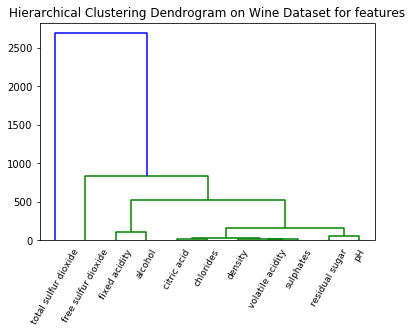

In [25]:
## author: Jörn Hees (JornHees)
linkage_matrix = linkage(df6, 'ward')
dendrogram(
    linkage_matrix,
    truncate_mode="lastp",  # show only the last p merged clusters
    p=40,                   # show only the last p merged clusters
    show_leaf_counts=True,  # numbers in brackets are counts, others idx
    leaf_rotation=60.,
    leaf_font_size=9.,
    show_contracted=True,  # to get a distribution impression in truncated branches
    labels = df2.columns[:-1]  #get the labels of the features
)
plt.title('Hierarchical Clustering Dendrogram on Wine Dataset for features')
plt.show()

As we can realize for the hiearchical function we can either test for simmilarity between the rows or column of the matrix. And testing for the features of the wine generated interesting results: the sulfure dioxide is standing out from the features of our wine dataset which could propably indicate an interesting 